In [3]:
import os
import pandas as pd

PATH_TO_DATA = './DataPredict/'

df_train_features = pd.read_csv(os.path.join(PATH_TO_DATA, 
                                             'train_features.csv'), 
                                    index_col='match_id_hash')
df_train_targets = pd.read_csv(os.path.join(PATH_TO_DATA, 
                                            'train_targets.csv'), 
                                   index_col='match_id_hash')

In [4]:
df_train_features.shape

(39675, 245)

In [5]:
df_train_features.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,...,0.000000,0,0,0,0,0.00,0,0,0,0
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,0.000000,0,0,0,0,0.00,0,0,0,0
6db558535151ea18ca70a6892197db41,21,23,0,0,0,101,0,0,0,0,...,0.000000,0,0,0,0,0.00,0,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,576,22,7,1,4,14,1,0,3,1,...,8.664527,3,1,3,0,0.00,0,0,2,0
b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,3,42,0,1,1,0,...,0.000000,2,1,2,0,0.25,0,0,0,0


In [6]:
df_train_targets.head()

,game_time,radiant_win,duration,time_remaining,next_roshan_team
match_id_hash,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,False,992,837,NaN
b9c57c450ce74a2af79c9ce96fac144d,658,True,1154,496,NaN
6db558535151ea18ca70a6892197db41,21,True,1503,1482,Radiant
46a0ddce8f7ed2a8d9bd5edcbb925682,576,True,1952,1376,NaN
b1b35ff97723d9b7ade1c9c3cf48f770,453,False,2001,1548,NaN


In [7]:
X = df_train_features.values
y = df_train_targets['radiant_win'].values

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.3, 
                                                      random_state=17)

In [9]:
%%time
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=17)
model.fit(X_train, y_train)

CPU times: total: 16.6 s
Wall time: 4.96 s


RandomForestClassifier(n_jobs=4, random_state=17)

In [10]:
y_pred = model.predict_proba(X_valid)[:, 1]

In [11]:
y_pred

array([0.14, 0.44, 0.5 , ..., 0.58, 0.72, 0.51])

In [12]:
from sklearn.metrics import roc_auc_score

valid_score = roc_auc_score(y_valid, y_pred)
print('Validation ROC-AUC score:', valid_score)

Validation ROC-AUC score: 0.7772318342722802


In [13]:
from sklearn.metrics import accuracy_score

valid_accuracy = accuracy_score(y_valid, y_pred > 0.5)
print('Validation accuracy of P>0.5 classifier:', valid_accuracy)

Validation accuracy of P>0.5 classifier: 0.6974712257414097


In [14]:
df_test_features = pd.read_csv(os.path.join(PATH_TO_DATA, 'test_features.csv'), 
                                   index_col='match_id_hash')

X_test = df_test_features.values
y_test_pred = model.predict_proba(X_test)[:, 1]

df_submission = pd.DataFrame({'radiant_win_prob': y_test_pred}, 
                                 index=df_test_features.index)

In [15]:
df_submission.head()

,radiant_win_prob
match_id_hash,
30cc2d778dca82f2edb568ce9b585caa,0.49
70e5ba30f367cea48793b9003fab9d38,0.81
4d9ef74d3a2025d79e9423105fd73d41,0.67
2bb79e0c1eaac1608e5a09c8e0c6a555,0.69
bec17f099b01d67edc82dfb5ce735a43,0.41


In [16]:
import datetime
submission_filename = 'submission_{}.csv'.format(
    datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
df_submission.to_csv(submission_filename)
print('Submission saved to {}'.format(submission_filename))

Submission saved to submission_2024-04-29_12-30-07.csv


In [17]:
from sklearn.model_selection import ShuffleSplit, KFold
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=17)
from sklearn.model_selection import cross_val_score

In [18]:
%%time

model_rf1 = RandomForestClassifier(n_estimators=100, n_jobs=4,
                                   max_depth=None, random_state=17)

# calcuate ROC-AUC for each split
cv_scores_rf1 = cross_val_score(model_rf1, X, y, cv=cv, scoring='roc_auc')

CPU times: total: 1min 20s
Wall time: 23.4 s


In [19]:
%%time

model_rf2 = RandomForestClassifier(n_estimators=100, n_jobs=4,
                                   min_samples_leaf=3, random_state=17)

cv_scores_rf2 = cross_val_score(model_rf2, X, y, cv=cv, 
                                scoring='roc_auc', n_jobs=-1)

CPU times: total: 297 ms
Wall time: 12.6 s


In [20]:
cv_scores_rf1

array([0.77723183, 0.78656801, 0.78004904, 0.77732062, 0.77669984])

In [21]:
cv_scores_rf2

array([0.78326349, 0.78474775, 0.7834313 , 0.77761297, 0.78531672])

In [22]:
print('Model 1 mean score:', cv_scores_rf1.mean())
print('Model 2 mean score:', cv_scores_rf2.mean())

Model 1 mean score: 0.7795738699757455
Model 2 mean score: 0.78287444565472


In [23]:
cv_scores_rf2 > cv_scores_rf1

array([ True, False,  True,  True,  True])

In [24]:
import json

with open(os.path.join(PATH_TO_DATA, 'train_matches.jsonl')) as fin:
    # read the 18-th line
    for i in range(18):
        line = fin.readline()
    
    # read JSON into a Python object 
    match = json.loads(line)

In [25]:
player = match['players'][2]
print(player)

{'player_slot': 2, 'hero_id': 23, 'hero_name': 'npc_dota_hero_kunkka', 'account_id_hash': '1c2500195e6ab646fc9371344724aa77', 'ability_upgrades': [{'ability': 5032, 'time': 227, 'level': 1}, {'ability': 5031, 'time': 288, 'level': 2}, {'ability': 5032, 'time': 339, 'level': 3}, {'ability': 5031, 'time': 413, 'level': 4}, {'ability': 5032, 'time': 465, 'level': 5}, {'ability': 5035, 'time': 548, 'level': 6}, {'ability': 5032, 'time': 606, 'level': 7}, {'ability': 5031, 'time': 778, 'level': 8}, {'ability': 5033, 'time': 963, 'level': 9}, {'ability': 5933, 'time': 1123, 'level': 10}, {'ability': 5031, 'time': 1306, 'level': 11}, {'ability': 5035, 'time': 1388, 'level': 12}, {'ability': 5033, 'time': 1494, 'level': 13}, {'ability': 5033, 'time': 1719, 'level': 14}, {'ability': 6385, 'time': 1925, 'level': 15}, {'ability': 5033, 'time': 1929, 'level': 16}], 'obs_placed': 0, 'sen_placed': 0, 'creeps_stacked': 0, 'camps_stacked': 0, 'rune_pickups': 4, 'firstblood_claimed': 0, 'teamfight_part

In [26]:
player['kills'], player['deaths'], player['assists']

(8, 11, 12)

In [27]:
player['ability_uses']

{'kunkka_torrent': 43,
 'kunkka_ghostship': 16,
 'kunkka_x_marks_the_spot': 8,
 'kunkka_return': 1}

In [28]:
from matplotlib import pyplot as plt
print(player)


{'player_slot': 2, 'hero_id': 23, 'hero_name': 'npc_dota_hero_kunkka', 'account_id_hash': '1c2500195e6ab646fc9371344724aa77', 'ability_upgrades': [{'ability': 5032, 'time': 227, 'level': 1}, {'ability': 5031, 'time': 288, 'level': 2}, {'ability': 5032, 'time': 339, 'level': 3}, {'ability': 5031, 'time': 413, 'level': 4}, {'ability': 5032, 'time': 465, 'level': 5}, {'ability': 5035, 'time': 548, 'level': 6}, {'ability': 5032, 'time': 606, 'level': 7}, {'ability': 5031, 'time': 778, 'level': 8}, {'ability': 5033, 'time': 963, 'level': 9}, {'ability': 5933, 'time': 1123, 'level': 10}, {'ability': 5031, 'time': 1306, 'level': 11}, {'ability': 5035, 'time': 1388, 'level': 12}, {'ability': 5033, 'time': 1494, 'level': 13}, {'ability': 5033, 'time': 1719, 'level': 14}, {'ability': 6385, 'time': 1925, 'level': 15}, {'ability': 5033, 'time': 1929, 'level': 16}], 'obs_placed': 0, 'sen_placed': 0, 'creeps_stacked': 0, 'camps_stacked': 0, 'rune_pickups': 4, 'firstblood_claimed': 0, 'teamfight_part

Text(0.5, 1.0, 'Gold change for all players')

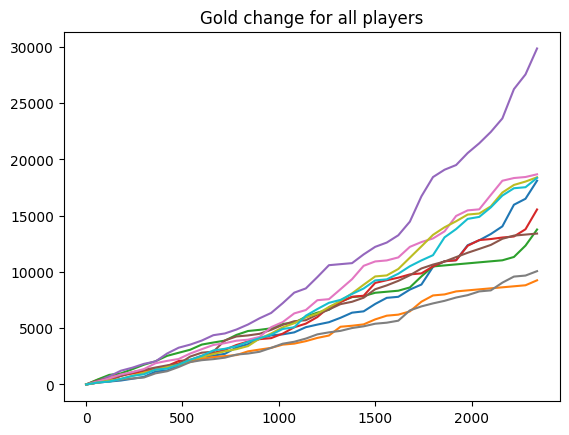

In [29]:
for player in match['players']:
    plt.plot(player['times'], player['gold_t'])
    
plt.title('Gold change for all players')

Text(0.5, 1.0, 'XP change for all players')

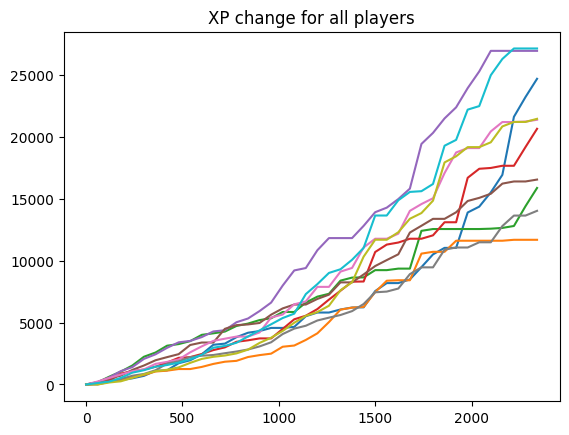

In [39]:
for player in match['players']:
    plt.plot(player['times'], player['xp_t'])
    
plt.title('XP change for all players')

In [41]:
keys_list = []

for player in match['players']:
    player_keys = []  # Создаем пустой список для каждого игрока
    for item in player['purchase_log']:
        player_keys.append(item['key'])  # Добавляем значение 'key' в список для текущего игрока
    keys_list.append(player_keys)  # Добавляем список 'player_keys' в общий список 'keys_list'

# Выводим списки ключей для каждого игрока
for i, player_keys in enumerate(keys_list):
    print(f"Player {i + 1} keys:", player_keys)

Player 1 keys: ['tango', 'orb_of_venom', 'enchanted_mango', 'tpscroll', 'magic_stick', 'tpscroll', 'clarity', 'clarity', 'boots', 'gauntlets', 'gauntlets', 'clarity', 'ring_of_regen', 'infused_raindrop', 'tpscroll', 'soul_ring', 'tome_of_knowledge', 'branches', 'branches', 'enchanted_mango', 'tpscroll', 'magic_wand', 'void_stone', 'staff_of_wizardry', 'tpscroll', 'tpscroll', 'wind_lace', 'tpscroll', 'tpscroll', 'cyclone', 'chainmail', 'broadsword', 'tpscroll', 'robe', 'blade_mail', 'tpscroll', 'tpscroll', 'ogre_axe', 'belt_of_strength', 'sange', 'heavens_halberd', 'talisman_of_evasion', 'tpscroll', 'tpscroll', 'tpscroll', 'platemail', 'shivas_guard', 'mystic_staff', 'tpscroll', 'ward_observer', 'ward_observer', 'ward_observer', 'ward_observer', 'ward_dispenser', 'ward_sentry', 'ward_dispenser', 'ward_sentry', 'ward_dispenser', 'ward_sentry']
Player 2 keys: ['tpscroll', 'courier', 'tango', 'tango', 'ward_observer', 'smoke_of_deceit', 'boots', 'clarity', 'clarity', 'tpscroll', 'tpscroll'

In [42]:
df_items = pd.DataFrame(keys_list)
df_items

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,tango,orb_of_venom,enchanted_mango,tpscroll,magic_stick,tpscroll,clarity,clarity,boots,gauntlets,...,ward_observer,ward_observer,ward_observer,ward_dispenser,ward_sentry,ward_dispenser,ward_sentry,ward_dispenser,ward_sentry,None
1,tpscroll,courier,tango,tango,ward_observer,smoke_of_deceit,boots,clarity,clarity,tpscroll,...,None,None,None,None,None,None,None,None,None,None
2,tpscroll,stout_shield,branches,quelling_blade,ring_of_protection,gauntlets,branches,boots,blades_of_attack,phase_boots,...,None,None,None,None,None,None,None,None,None,None
3,tango,branches,branches,stout_shield,ring_of_protection,tpscroll,enchanted_mango,magic_stick,magic_wand,flask,...,boots,energy_booster,ring_of_regen,branches,headdress,chainmail,branches,buckler,mekansm,arcane_boots
4,quelling_blade,stout_shield,tango,tpscroll,ring_of_health,boots,void_stone,pers,demon_edge,bfury,...,None,None,None,None,None,None,None,None,None,None
5,stout_shield,tango,quelling_blade,tpscroll,bottle,boots,tpscroll,tpscroll,helm_of_iron_will,helm_of_iron_will,...,None,None,None,None,None,None,None,None,None,None
6,tpscroll,stout_shield,tango,quelling_blade,enchanted_mango,boots,tpscroll,tango,gloves,belt_of_strength,...,None,None,None,None,None,None,None,None,None,None
7,tpscroll,courier,tango,clarity,clarity,ward_observer,magic_stick,branches,branches,enchanted_mango,...,None,None,None,None,None,None,None,None,None,None
8,quelling_blade,tango,stout_shield,tpscroll,wind_lace,flask,gloves,boots,tpscroll,tpscroll,...,None,None,None,None,None,None,None,None,None,None
9,stout_shield,quelling_blade,tango,tpscroll,gloves,boots,belt_of_strength,power_treads,tpscroll,orb_of_venom,...,None,None,None,None,None,None,None,None,None,None


<Figure size 1000x5000 with 0 Axes>

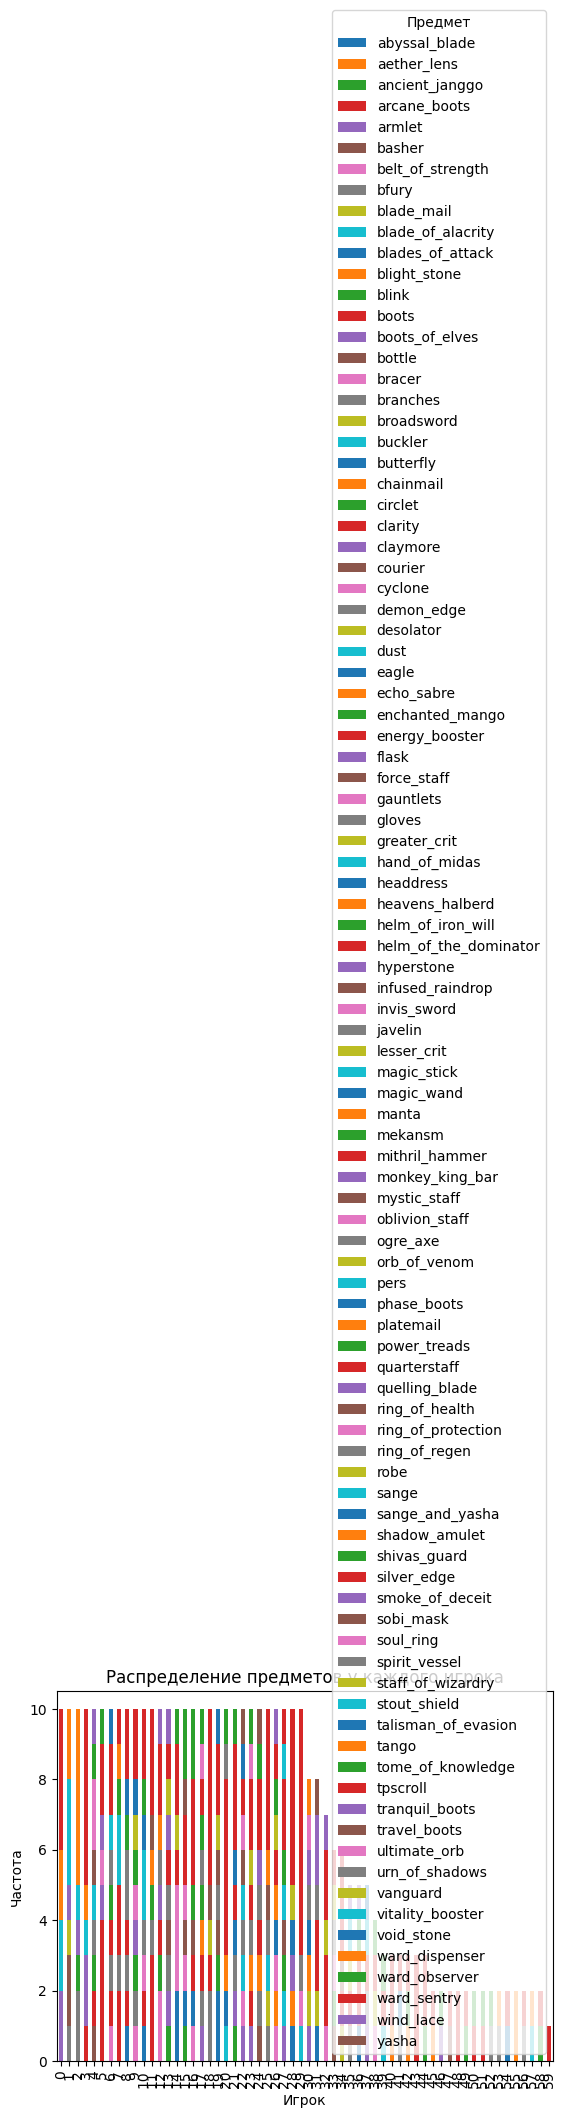

In [54]:
plt.figure(figsize=(10, 50))
df_items.apply(lambda x: x.value_counts()).T.plot(kind='bar', stacked=True)
plt.title('Распределение предметов у каждого игрока')
plt.xlabel('Игрок')
plt.ylabel('Частота')
plt.legend(title='Предмет')
plt.show()


C:\Users\mynam\AppData\Local\Temp\ipykernel_14308\2847521496.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sns.heatmap(df_items.apply(pd.value_counts), cmap="YlGnBu", annot=True, fmt="f", cbar=False, linecolor='black')
C:\Users\mynam\AppData\Local\Temp\ipykernel_14308\2847521496.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sns.heatmap(df_items.apply(pd.value_counts), cmap="YlGnBu", annot=True, fmt="f", cbar=False, linecolor='black')
C:\Users\mynam\AppData\Local\Temp\ipykernel_14308\2847521496.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sns.heatmap(df_items.apply(pd.value_counts), cmap="YlGnBu", annot=True, fmt="f", cbar=False, linecolor='black')
C:\Users\mynam\AppData\Local\Temp\ipykernel_14308\28475214

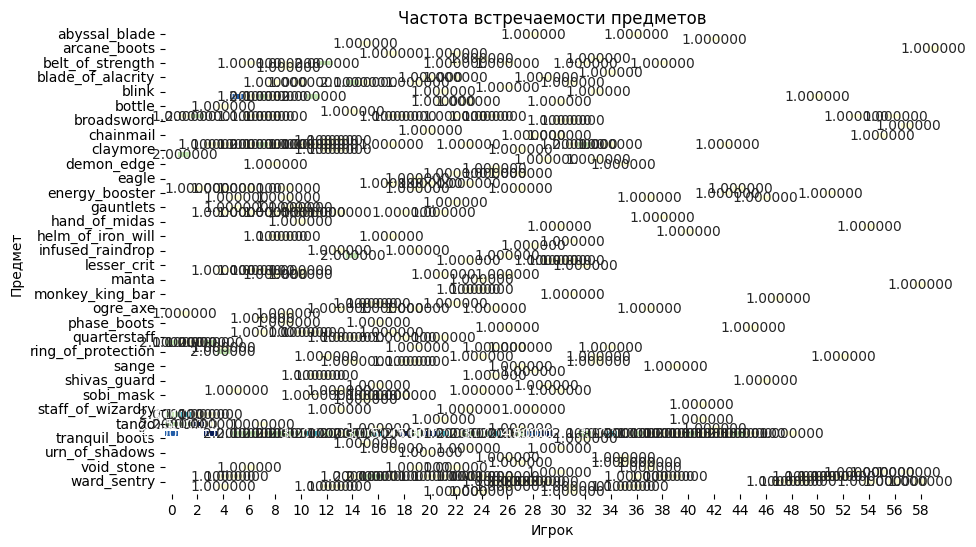

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df_items.apply(pd.value_counts), cmap="YlGnBu", annot=True, fmt="f", cbar=False, linecolor='black')
plt.title('Частота встречаемости предметов')
plt.xlabel('Игрок')
plt.ylabel('Предмет')
plt.show()


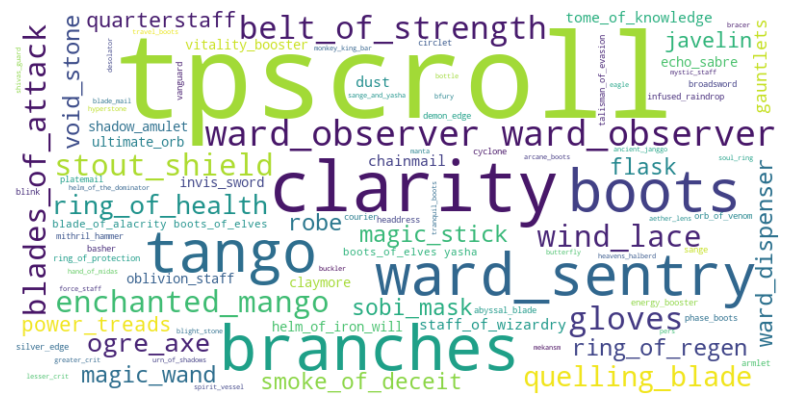

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Создаем строку, объединяя все значения в вашем DataFrame
text = ' '.join(df_items.stack().values)

# Создаем облако тегов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Отображаем облако тегов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()